In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#### TODO install geopandas
#import geopandas as gp
from sklearn.preprocessing import normalize
from scipy.sparse import coo_matrix, csr_matrix

In [16]:
#feed in standardized data
#need to do a DF.to_csv from the other files
df_form = pd.read_csv("formationout.csv")
df_well = pd.read_csv("out.csv")
#Merge the 2 CSVs by API number
df_well.join(df_form, lsuffix = " ")
#Not sure how to proceed with this, using formation csv only for first attempt
df_form.head()



,API Number,Well Number,Form Alias,Top MD
0,490252206600,2-22,0,902.35
1,490252206600,2-22,1,541.44
2,490252206600,2-22,2,488.36
3,490252206600,2-22,3,1005.26
4,490252206600,2-22,4,1070.76


In [22]:
#not sure if this is correct, following example notebook
D_df = df_form.pivot_table("Form Alias","Top MD","API Number").fillna(0)
D_df

API Number,490250625600,490250630100,490250632100,490250632500,490250632700,490250632800,490250632900,490250633200,490250633400,490250633800,...,490252303100,490252304000,490252304700,490252304800,490252305400,490252305500,490252319500,490252345102,490252347904,490256001300
Top MD,,,,,,,,,,,,,,,,,,,,,
-683.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-679.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-436.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-366.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-308.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-288.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-211.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-71.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-45.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
R = D_df.values
well_depth_mean = np.mean(R, axis = 1)
R_demeaned = R - well_depth_mean.reshape(-1, 1)

In [25]:
from sklearn.preprocessing import binarize
A = binarize(R)

This is the important part of the notebook, everything else as far as I can tell is just reshaping and manipulating data.

In [27]:
#ALS factorization from 
# https://github.com/mickeykedia/Matrix-Factorization-ALS/blob/master/ALS%20Python%20Implementation.py
# here items are the formation and users are the well
def runALS(A, R, n_factors, n_iterations, lambda_):
    """
    Runs Alternating Least Squares algorithm in order to calculate matrix.
    :param A: User-Item Matrix with ratings
    :param R: User-Item Matrix with 1 if there is a rating or 0 if not
    :param n_factors: How many factors each of user and item matrix will consider
    :param n_iterations: How many times to run algorithm
    :param lambda_: Regularization parameter
    :return:
    """
    print("Initiating ")
    lambda_ = lambda_
    n_factors = 20
    n, m = A.shape
    n_iterations = n_iterations
    Users = 5 * np.random.rand(n, n_factors)
    Items = 5 * np.random.rand(n_factors, m)

    def get_error(A, Users, Items, R):
        # This calculates the MSE of nonzero elements
        return np.sum((R * (A - np.dot(Users, Items))) ** 2) / np.sum(R)

    MSE_List = []

    print("Starting Iterations")
    for iter in range(n_iterations):
        for i, Ri in enumerate(R):
            Users[i] = np.linalg.solve(
                np.dot(Items, np.dot(np.diag(Ri), Items.T))
                + lambda_ * np.eye(n_factors),
                np.dot(Items, np.dot(np.diag(Ri), A[i].T)),
            ).T
        print(
            "Error after solving for User Matrix:",
            get_error(A, Users, Items, R),
        )

        for j, Rj in enumerate(R.T):
            Items[:, j] = np.linalg.solve(
                np.dot(Users.T, np.dot(np.diag(Rj), Users))
                + lambda_ * np.eye(n_factors),
                np.dot(Users.T, np.dot(np.diag(Rj), A[:, j])),
            )
        print(
            "Error after solving for Item Matrix:",
            get_error(A, Users, Items, R),
        )

        MSE_List.append(get_error(A, Users, Items, R))
        print("%sth iteration is complete..." % iter)
    return Users, Items
    # print(MSE_List)
    # fig = plt.figure()
    # ax = fig.add_subplot(111)
    # plt.plot(range(1, len(MSE_List) + 1), MSE_List); plt.ylabel('Error'); plt.xlabel('Iteration')
    # plt.title('Python Implementation MSE by Iteration \n with %d formations and %d wells' % A.shape);
    # plt.savefig('Python MSE Graph.pdf', format='pdf')
    # plt.show()

In [28]:
U, Vt = runALS(R, A, 10, 5, 0.1)

Initiating 
Starting Iterations
Error after solving for User Matrix: 7.946533118536366e-05
Error after solving for Item Matrix: 0.45512556531462706
0th iteration is complete...
Error after solving for User Matrix: 0.0006531844521625969
Error after solving for Item Matrix: 0.09730648692550731
1th iteration is complete...
Error after solving for User Matrix: 0.0001124932083383893
Error after solving for Item Matrix: 0.053069860516330156
2th iteration is complete...
Error after solving for User Matrix: 0.00013455862311994215
Error after solving for Item Matrix: 0.035557339624379194
3th iteration is complete...
Error after solving for User Matrix: 0.0001615272455603209
Error after solving for Item Matrix: 0.026540081219127747
4th iteration is complete...


In [30]:
recommendations = np.dot(U, Vt)
recsys_df = pd.DataFrame(data = recommendations[0:, 0:], index = D_df.index,
                        columns = D_df.columns)

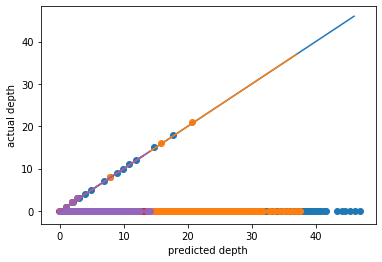

In [33]:
for i in range(5):
    plt.scatter(recsys_df.iloc[0:, i].values, D_df.iloc[0:, i].values) #plot predicted vs actual
    plt.xlabel('predicted depth')
    plt.ylabel('actual depth')
    plt.plot(np.arange(0,recsys_df.iloc[0:,i].max()))

Predicted depths

In [43]:
recsys_df.iloc[0:, 1]

Top MD
-683.00     18.860133
-679.00     20.665323
-436.00     18.491828
-366.00     22.310064
-308.00     21.175799
-288.00     20.249018
-211.00     26.610223
-71.00      21.191543
-45.00      20.349740
-42.00      20.745014
-15.00      17.790095
 0.00        1.601051
 0.80        2.945788
 1.98        1.745956
 3.10        0.662164
 3.74        2.387660
 4.22        1.079431
 5.73        3.166658
 5.89        0.477895
 9.72        1.180876
 9.90        2.795929
 10.86       1.363632
 11.78       1.504912
 12.15       2.744477
 12.17       1.562757
 12.43       1.718537
 12.47       1.498136
 12.74       0.767066
 12.84       1.734556
 14.42       2.795179
              ...    
 5802.74    22.107686
 5814.75    36.970962
 5818.62    32.804954
 5821.25    21.154755
 5822.76     7.455356
 5832.76    33.518105
 5848.33    34.231256
 5857.87    34.944407
 5864.89    35.657558
 5880.94    21.859913
 5949.56    17.338150
 5973.26    17.879968
 6001.26    18.057257
 6018.13    18.621546
 60

Actual depths

In [37]:
D_df.iloc[0:, 1]

Top MD
-683.00     0.0
-679.00     0.0
-436.00     0.0
-366.00     0.0
-308.00     0.0
-288.00     0.0
-211.00     0.0
-71.00      0.0
-45.00      0.0
-42.00      0.0
-15.00      0.0
 0.00       0.0
 0.80       0.0
 1.98       0.0
 3.10       0.0
 3.74       0.0
 4.22       0.0
 5.73       0.0
 5.89       0.0
 9.72       0.0
 9.90       0.0
 10.86      0.0
 11.78      0.0
 12.15      0.0
 12.17      0.0
 12.43      0.0
 12.47      0.0
 12.74      0.0
 12.84      0.0
 14.42      0.0
           ... 
 5802.74    0.0
 5814.75    0.0
 5818.62    0.0
 5821.25    0.0
 5822.76    0.0
 5832.76    0.0
 5848.33    0.0
 5857.87    0.0
 5864.89    0.0
 5880.94    0.0
 5949.56    0.0
 5973.26    0.0
 6001.26    0.0
 6018.13    0.0
 6034.41    0.0
 6060.90    0.0
 6078.49    0.0
 6080.67    0.0
 6104.94    0.0
 6124.61    0.0
 6139.19    0.0
 6139.34    0.0
 6172.71    0.0
 6202.71    0.0
 6222.70    0.0
 6253.44    0.0
 6283.72    0.0
 6309.66    0.0
 6330.21    0.0
 6848.08    0.0
Name: 49025063010